<a href="https://colab.research.google.com/github/inhopp/ML_code/blob/main/Pascal_VOC_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 인프런에 있는 권철민님의 [딥러닝 컴퓨터 비전 완벽 가이드](https://www.inflearn.com/course/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C/dashboard) 강의 실습 자료입니다.

## PASCAL VOC 2012 데이터 다운

pascal visual object classes

In [1]:
# pascal voc 2012 데이터를 다운로드 후 /content/data 디렉토리에 압축 해제
# DOWNLOAD시 약 3분정도 시간 소요. 아래 디렉토리가 잘 동작하지 않을 경우 https://web.archive.org/web/20140815141459/http://pascallin.ecs.soton.ac.uk/challenges/VOC/voc2012/VOCtrainval_11-May-2012.tar
!mkdir ./data

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/Segmentati

In [2]:
!ls /content/data/VOCdevkit/VOC2012
!ls /content/data/VOCdevkit/VOC2012/JPEGImages | head -n 5

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject
2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg


## JPEGImages 디렉토리 보기

img shape: (281, 500, 3)


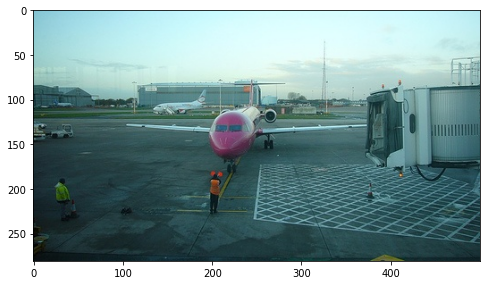

In [3]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

default_dir = '/content/data'
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

## Annotations 디렉토리 파일 보기 (xml파일)

In [4]:
!cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

## SegmentationObject 디렉토리 보기

img shape: (281, 500, 3)


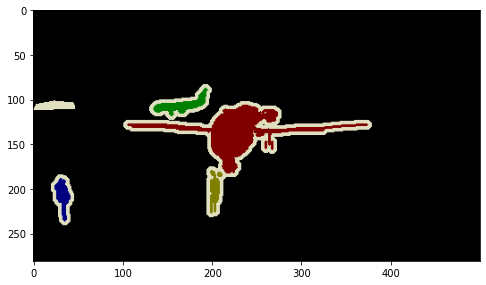

In [5]:
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

## Annotation (xml파일) 데이터 파싱하여 접근하기
-  ElementTree를 이용하여 XML 파싱(lxml 패키지는 이미 코랩에 설치됨. pip install lxml)

In [6]:
import random

VOC_ROOT_DIR = "/content/data/VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

xml_files = os.listdir(ANNO_DIR)
print(xml_files[:5]); print(len(xml_files))

['2008_003926.xml', '2009_000318.xml', '2010_004228.xml', '2011_003898.xml', '2010_000295.xml']
17125


In [7]:
# !pip install lxml
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

# XML 파일을 Parsing 하여 Element 생성
tree = ET.parse(xml_file)
root = tree.getroot()

# image 관련 정보는 root의 자식으로 존재
image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    # object element의 자식 element에서 bndbox를 찾음. 
    xmlbox = obj.find('bndbox')
    # bndbox element의 자식 element에서 xmin,ymin,xmax,ymax를 찾고 이의 값(text)를 추출 
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)
    
    bndbox_pos = (x1, y1, x2, y2)
    class_name=obj.find('name').text
    object_dict={'class_name': class_name, 'bndbox_pos':bndbox_pos}
    objects_list.append(object_dict)

print('full_image_name:', full_image_name,'\n', 'image_size:', (image_width, image_height))

for object in objects_list:
    print(object)    

full_image_name: /content/data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg 
 image_size: (500, 281)
{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}
